In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from hilde.trajectory import reader
from hilde.green_kubo.heat_flux import get_kappa, get_heat_flux_aurocorrelation

%matplotlib inline

In [2]:
import seaborn as sns
sns.set_context('paper', font_scale=1.8)

## Create `heat_flux.nc`
Run
```bash
➤ hilde output md CsPbBr_300K.son -hf -d 200
```

In [3]:
# read the heat flux data.set
DS = xr.load_dataset('heat_flux.nc')
DS

<xarray.Dataset>
Dimensions:      (I: 160, a: 3, time: 471)
Coordinates:
  * time         (time) float64 0.0 25.0 50.0 ... 1.17e+04 1.172e+04 1.175e+04
Dimensions without coordinates: I, a
Data variables:
    heat_flux    (time, I, a) float64 0.0001144 0.0002858 ... 5.227e-05
    pressure     (time) float64 0.003409 0.003419 0.003479 ... 0.004159 0.00394
    temperature  (time) float64 289.7 305.3 315.1 323.9 ... 299.9 295.1 302.0
Attributes:
    System Name:                    Br3CsPb
    natoms:                         160
    time unit:                      fs
    timestep:                       25.0
    nsteps:                         470
    volume:                         6528.916195244441
    symbols:                        ['Pb', 'Pb', 'Pb', 'Pb', 'Pb', 'Pb', 'Pb'...
    masses:                         [207.2        207.2        207.2        2...
    flattened reference positions:  [ 0.          5.89428374  0.          8.4...
    flattened lattice:              [16.85303852  0.

In [9]:
ds = get_kappa(DS, delta='auto')

[GreenKubo]    Compute Prefactor:
[GreenKubo]    .. Volume:          6528.92  AA^3
[GreenKubo]    .. Temperature:      309.62  K
[GreenKubo]    -> Prefactor:       1266.15  W/mK / (eV/AA^/ps)
[GreenKubo]    Get heat flux autocorrelation from heat flux
[GreenKubo]    Compute Prefactor:
[GreenKubo]    .. Volume:          6528.92  AA^3
[GreenKubo]    .. Temperature:      309.62  K
[GreenKubo]    -> Prefactor:       1266.15  W/mK / (eV/AA^/ps)
[GreenKubo]    .. time elapsed: 2.250s
[GreenKubo]    Integrate heat flux autocorrelation function cumulatively
[GreenKubo]    .. Integrator:   `scipy.integrate.cumtrapz`
[GreenKubo]    Pre-est. correlation time (drop below 1/e):      75.00 fs
[GreenKubo]    .. use 4 data points to fit exponential
[GreenKubo]    .. estimated correlation time:                   66.10 fs
[GreenKubo]    -> choose delta of size:                    3 data points
[GreenKubo]    -> avalanche time with max. F of  1:            100.00 fs
[GreenKubo]    Integrate heat flux aut

<xarray.Dataset>
Dimensions:   (I: 160, a: 3, b: 3, time: 471)
Coordinates:
  * time      (time) float64 0.0 25.0 50.0 75.0 ... 1.17e+04 1.172e+04 1.175e+04
Dimensions without coordinates: I, a, b
Data variables:
    Jcorr     (time, a, b) float64 0.01056 0.0003882 0.0006293 ... 0.0 0.0 0.0
    Jcorr_II  (time, I, a, b) float64 5.76e-05 4.823e-06 5.431e-06 ... -0.0 -0.0
    kappa     (time, a, b) float64 0.0 0.0 0.0 0.0 ... -0.02001 0.302 0.07294
    kappa_II  (time, a, b) float64 0.0 0.0 0.0 0.0 ... 0.07509 -0.02931 0.5023
Attributes:
    gk_prefactor:  1266.1450577294136
    t_avalanche:   100.0

In [11]:
ds.kappa_II

<xarray.DataArray 'kappa_II' (time: 471, a: 3, b: 3)>
array([[[ 0.000000e+00,  0.000000e+00,  0.000000e+00],
        [ 0.000000e+00,  0.000000e+00,  0.000000e+00],
        [ 0.000000e+00,  0.000000e+00,  0.000000e+00]],

       [[ 2.182225e-01,  6.740635e-04,  4.955814e-03],
        [ 3.771517e-04,  2.169519e-01,  3.845973e-03],
        [ 4.888556e-03,  3.333841e-03,  2.204891e-01]],

       ...,

       [[ 4.721470e-01, -1.110354e-01,  1.380967e-01],
        [ 2.250210e-02,  5.739598e-01,  2.026197e-02],
        [ 7.509313e-02, -2.931364e-02,  5.022694e-01]],

       [[ 4.721470e-01, -1.110352e-01,  1.380967e-01],
        [ 2.250212e-02,  5.739599e-01,  2.026190e-02],
        [ 7.509301e-02, -2.931380e-02,  5.022696e-01]]])
Coordinates:
  * time     (time) float64 0.0 25.0 50.0 75.0 ... 1.17e+04 1.172e+04 1.175e+04
Dimensions without coordinates: a, b
Attributes:
    t_avalanche:  150.0

In [5]:
j = pd.DataFrame({
    'j1': ds.Jcorr[:, 0, 0], 
    'j2': ds.Jcorr[:, 1, 1],
    'j3': ds.Jcorr[:, 2, 2]}, index=ds.time)

k = np.trace(ds.kappa, axis1=1, axis2=2) / 3
k = pd.Series(k, index=ds.time)

In [6]:
Jcorr_II = ds.Jcorr_II.sum(axis=1)

ji = pd.DataFrame({
    'j1': Jcorr_II[:, 0, 0], 
    'j2': Jcorr_II[:, 1, 1],
    'j3': Jcorr_II[:, 2, 2]}, index=ds.time)

ki = np.trace(ds.kappa_II, axis1=1, axis2=2) / 3
ki = pd.Series(ki, index=ds.time)

In [7]:
df = pd.DataFrame({
    'j': j.sum(axis=1),
    'ji': ji.sum(axis=1),
    'j - ji': (j - ji).sum(axis=1),
    'k': k,
    'ki': ki
})

j_df = df[['j', 'ji', 'j - ji']]
k_df = df[['k', 'ki']]

0.3401563148255578

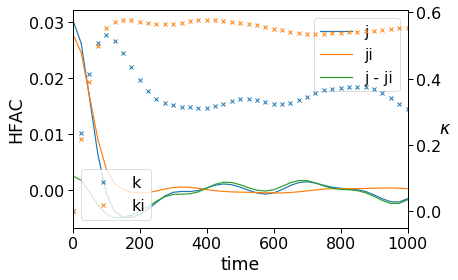

In [8]:
#plot

ax1 = j_df.plot()
ax1.set_ylabel('HFAC')

ax2 = ax1.twinx()
k_df.plot(ax=ax2, style='x')
ax2.set_ylabel(r'$\kappa$', rotation=0)

# x = np.asarray(j.index)
# ax1.plot(x, 0.03 * np.exp(- x / 62))

ax1.set_xlim([0, 1000])

k.iloc[10]